# 1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

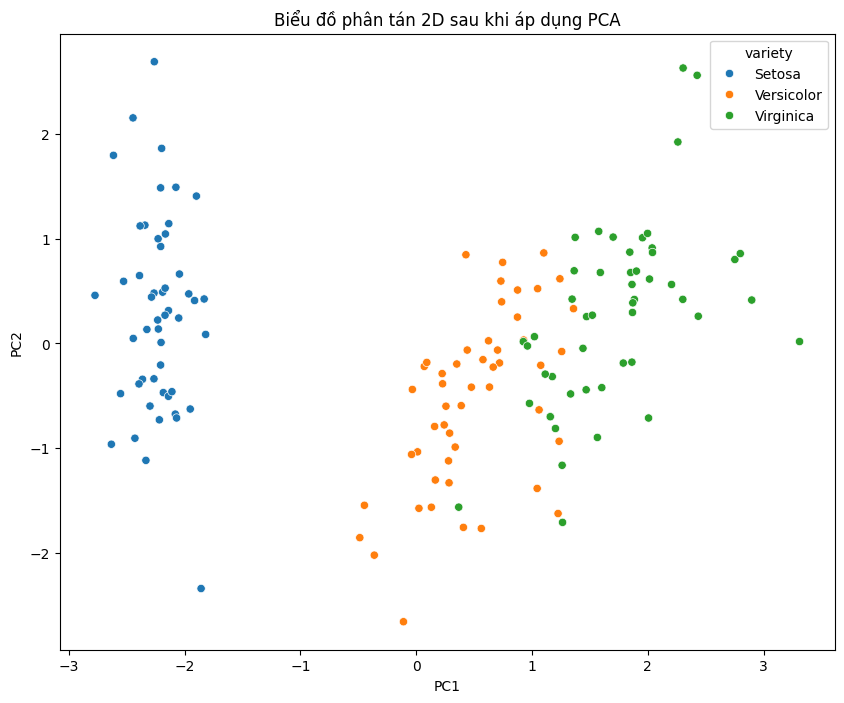

In [2]:
df = pd.read_csv("iris.csv")

# Normalize data
X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)

# Apply PCA and retain the two principal components
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a new DataFrame from the PCA result and label the data layer
df_pca = pd.DataFrame(data=result, columns=["PC1", "PC2"])
df_pca["variety"] = df["variety"]   

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="variety")
plt.title("Biểu đồ phân tán 2D sau khi áp dụng PCA")
plt.show()

# 2) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả, chia Train:Test = 4:1 (theo từng loại hoa để tránh phân bố các loại hoa trong tập train và tập test mất cân bằng), tương ứng với 02 trường hợp:


- a. Chạy với dữ liệu nguyên bản, lưu lại độ chính xác, ma trận nhầm lẫn trong trường hợp này;

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

# Divide the data set into a training set and a test set in a ratio of 4:1 for each type of flower
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Initialize the LogisticRegression model and train on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the label for the test set
y_pred = model.predict(X_test)

In [5]:
# Evaluate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9333333333333333
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


- b. Chạy với dữ liệu giảm chiều, hãy xử lý theo 02 quy trình dưới đây: <br>

  i. Chia dữ liệu thành Train – Test, sau đó thực hiện giảm chiều một cách phù hợpvà thực hiện bài toán phân loại. Lưu lại các kết quả.


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Reduce data dimensionality using principal component analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the LogisticRegression model and train on the reduced-dimensional training set
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predict labels for the reduced-dimensional test set
y_pred = model.predict(X_test_pca)

In [9]:
# Predict labels for the reduced-dimensional test set
y_pred = model.predict(X_test_pca)

In [8]:
# Evaluate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


  ii. Thực hiện giảm chiều trên toàn bộ dữ liệu, sau đó chia thành dữ liệu train:test và thực hiện bài toán phân loại..

In [11]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

# Reduce data dimensionality using Principal Component Analysis (PCA) on the entire data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [12]:
# Divide the reduced-dimensional data set into a training set and a test set in a 4:1 ratio cEvaluate accuracy and confusion matrix: for each type of flower
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# Initialize the LogisticRegression model and train on the reduced-dimensional training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict labels for the reduced-dimensional test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


Hãy so sánh kết quả trong 2 trường hợp i) và ii) để tìm ra quy trình phù hợp khi xử lý giảm chiều dữ liệu để phục vụ bài toán phân loại (tương tự với hồi quy). Hãy giải thích. Sau đó so sánh kết quả trong trường hợp dữ liệu nguyên bản và dữ liệu giảm chiều.

- Trong quá trình so sánh hai trường hợp a) và b), ta thấy rằng khi sử dụng dữ liệu gốc, ta có kết quả tốt hơn với độ chính xác là 0.93333 so với 0.9. Điều này được lý giải bởi việc áp dụng quy trình giảm chiều dữ liệu có thể dẫn đến mất mát thông tin và ảnh hưởng đến khả năng phân loại.

- Trong khi đó, giữa hai trường hợp b) i) và ii), ta không thấy sự khác biệt đáng kể. Cả hai trường hợp đều có độ chính xác là 0.9 và ma trận nhầm lẫn tương tự. Điều này cho thấy không có sự khác biệt đáng kể giữa việc giảm chiều dữ liệu trước hoặc sau khi chia dữ liệu thành tập train và tập test. Cả hai quy trình đều dẫn đến kết quả tương tự trong việc phân loại dữ liệu.

- Tuy nhiên, cần lưu ý rằng kết quả có thể thay đổi tùy thuộc vào dữ liệu cụ thể và bài toán phân loại. Trong nhiều trường hợp, việc giảm chiều dữ liệu trước khi chia dữ liệu có thể mang lại kết quả tốt hơn, đặc biệt khi dữ liệu ban đầu có số chiều lớn và không gian đặc trưng thưa. Việc giảm chiều trên toàn bộ dữ liệu trước khi chia có thể giúp mô hình học được các đặc trưng quan trọng hơn và giảm thiểu nhiễu.